* Imagine that you have a blob of plasma that is overpressured compared to the external medium (its internal magnetic fields and particles have more pressure than the outside), so it will expand. 
* Assume that the size increases linearly in time, and that there is a power-law of electrons with distribution $N(E) = CE^{−p}dE$ in equipartition with the magnetic field.
* Also assume that the total energy inside the blob is conserved.
* Use formulae from the books and the lectures to derive expressions for how the intensity scales with size for the cases:
    * a) τ >> 1. Hint: think about the visible volume.
    * b) τ << 1. The motivation here is that as a blob expands, it will transition from optically thick to thin because of the change in density!

* Write a code for the light-curve of this expanding blob (intensity vs. time) and make a plot of your results. 
* Normalise assuming equipartition for Sgr A* in order to be able to get your answer in physical units, and convert to mJy for the intensity unit on the y-axis.

In [297]:
#Importing the libraries we need.
import numpy as np
import matplotlib.pyplot as plt
import math

#We first define all the Constant values we have in cgs units!

q = 5e-10 #Electron Charge
mass_e = 1e-27 #Mass of Electron
c = 3e10 #Speed of Light
p = 2 #Power Law Index
frequency = 1e12 #Frequency in terms of Hz
angular_freq = frequency * 2 * np.pi #Angular Frequency
radius_initial = 1e13 #The initial radius of the blob (for Sgr A)
efficiency_factor = 1e-7 #Radiative Efficiency
velocity = 0.3 * c #The velocity of the expansion

mass_sgrA = 4e6 #The mass of the Sgr A in terms of Solar Mass
edd_lum = 1.26e38 * mass_sgrA #Eddington Luminosity
distance = 26670 * 9.461e+17 #Distance to Sgr A in terms of cm
gamma = 1000
#Note: We take the sine of the pitch angle as 1!!!

G = 6.67e-8
M_sun = 1.988e33
rg = G*mass_sgrA*M_sun/c**2
radius_initial = 10 * rg

In [298]:
#Now we define the change in Radius in time.
def Radius(time):
    """Takes the time and returns the Radius of the expanding blob at that
    time."""
    
    #Defining radius using R(t) = R_initial + 0.3ct
    radius_time = radius_initial + (0.3 * c * time)
    
    return radius_time

In [299]:
#For Magnetic Field, we will use the initial values.
#For this, we calculate the following parameters.

#Initial Volume of the Blob
Volume_initial = (4/3) * np.pi * (radius_initial ** 3)

#Initial Electron Energy Density of the Blob
Ue_initial = (efficiency_factor * edd_lum)/(4 * np.pi * (radius_initial**2) * velocity)

#Initial Magnetic Field of the Blob (Using Equipartition)
B_initial = np.sqrt(8 * np.pi * Ue_initial)

#Initial Total Electron Energy in the Blob
Ee_initial = Ue_initial * Volume_initial

#Initial Magnetic Field Energy Density of the Blob
Ub_initial = (B_initial**2) / (8 * np.pi)

#Initial Total Magnetic Field Energy in the Blob
Eb_initial = Ub_initial * Volume_initial

#Total Energy
Etotal_initial = Ee_initial + Eb_initial

In [304]:
#Now we define the Magnetic Field Strength per time.
def Magnetic_Field(time):
    """Takes the time and calculates the Magnetic Field Strength at that time."""
    
    #We can calculate the change in the Magnetic Field over different
    #radiuses as follows.
    magnetic_field = np.sqrt(3 * Etotal_initial) / (Radius(time) ** (3/2))
    
    return magnetic_field

In [302]:
#Now we can also define the Normalization Constant for Power.
def Norm_Constant_Power(time):
    """Takes the distance and calculates the Normalization Constant for Power
    so "C" at that time."""
    
    #Assuming Equipartition, since U_e = U_b we can write the following for the
    #first part of the normalization constant C hat.
    normalization_constant_1 = (Magnetic_Field(time)**2) / (8*np.pi)
    
    #We need to divide U_e with the logarithm of the Lorentz Factor we have.
    #For that we write the second part of the normalization constant.
    normalization_constant_2 = np.log(gamma)
    
    #From here, C hat can be written as follows.
    normalization_constant = normalization_constant_1 / normalization_constant_2
    
    #So far we got the C hat.
    #Since C is equal to C hat divided by the mass of electron and speed of 
    #light squared we can write the following.
    normalization_constant = normalization_constant / (mass_e * (c ** 2))
    
    return normalization_constant

In [303]:
#Next we define the Normalization Constant for Absorption Coefficient.
def Norm_Constant_Abs_Coeff(time):
    """Takes the distance and calculates the Normalization Constant for 
    Absorption Coefficient so "C hat" at that time."""
    
    #Assuming Equipartition, since U_e = U_b we can write the following for the
    #first part of the normalization constant C hat.
    normalization_constant_1 = (Magnetic_Field(time)**2) / (8*np.pi)
    
    #We need to divide U_e with the logarithm of the Lorentz Factor we have.
    #For that we write the second part of the normalization constant.
    normalization_constant_2 = np.log(gamma)
    
    #From here, C hat can be written as follows.
    normalization_constant = normalization_constant_1 / normalization_constant_2
    
    return normalization_constant

In [296]:
#Now we find the Total Power for the given Frequency and Time.
def Total_Power(time):
    """Takes the time and calculates the Total Power at that time."""
    
    #We will split all the multiplications to avoid writing the whole equation
    #in one line.
    total_power_1 = (np.sqrt(3)*pow(q,3))/(2*np.pi*mass_e*pow(c,2)*(p+1))
    total_power_2 = Norm_Constant_Power(time)
    total_power_3 = Magnetic_Field(time)
    total_power_4 = math.gamma((p/4)+(19/12)) * math.gamma((p/4)-(1/12))
    total_power_5 = ((mass_e * c * angular_freq) / (3 * q * Magnetic_Field(time))) ** (-(p-1)/2)

    #Total Power
    total_power = total_power_1 * total_power_2 * total_power_3 * total_power_4 * total_power_5
    
    #Since this the Total Power for Angular Frequency, we need to convert it to 
    #frequency by using the following.
    total_power = 2 * np.pi * total_power
    
    return total_power

In [322]:
#Now we find the Absorption Coefficient for the given Frequency and Time.
def Absorption_Coefficient(time):
    """Takes the time and calculates the Absorption Coefficient at that time."""
    
    #We will split all the multiplications to avoid writing the whole equation
    #in one line.
    abs_coeff_1 = (np.sqrt(3)*pow(q,3))/(8*np.pi*mass_e)
    abs_coeff_2 = ((3*q)/(2*math.pi*pow(mass_e,3)*pow(c,5))) ** (p/2)
    abs_coeff_3 = Norm_Constant_Abs_Coeff(time)
    abs_coeff_4 = Magnetic_Field(time) ** ((p+2)/2)
    abs_coeff_5 = math.gamma(((3*p+2)/12)) * math.gamma(((3*p+22)/12))
    abs_coeff_6 = frequency ** (-(p+4)/2)

    #Absorption Coefficient
    abs_coeff = abs_coeff_1 * abs_coeff_2 * abs_coeff_3 * abs_coeff_4 * abs_coeff_5 * abs_coeff_6

    return abs_coeff

In [313]:
#Now we can get the Source Function
def Source_Function(time):
    """Takes the time and calculates the Source Function at that time."""
    
    source_function = Total_Power(time) / (4 * np.pi * Absorption_Coefficient(time))
    
    return source_function

In [315]:
#We can also get the Optical Depth at that time!
def Optical_Depth(time):
    """Takes the time and calculates the Optical Depth at that time."""
    
    optical_depth = Absorption_Coefficient(time) * Radius(time)
    
    return optical_depth

In [318]:
#Finally, we define the Intensity at given time!
def Specific_Intensity(time):
    """Takes the time and calculates the Specific Intensity at that time."""

    specific_intensity = Source_Function(time) * (1 - np.exp(-Optical_Depth(time)))

    return specific_intensity

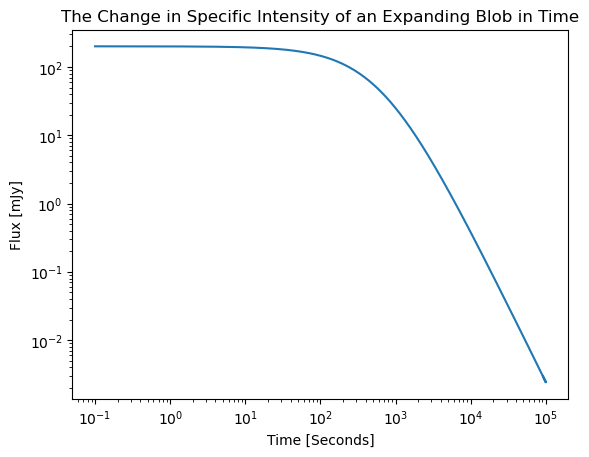

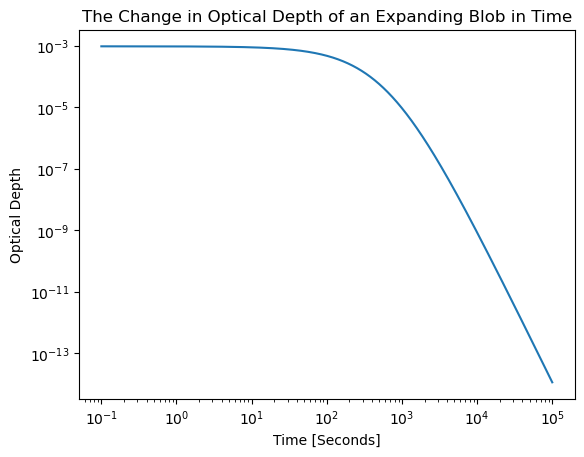

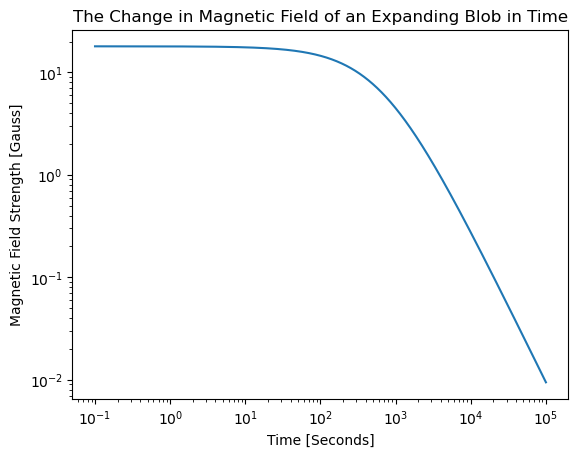

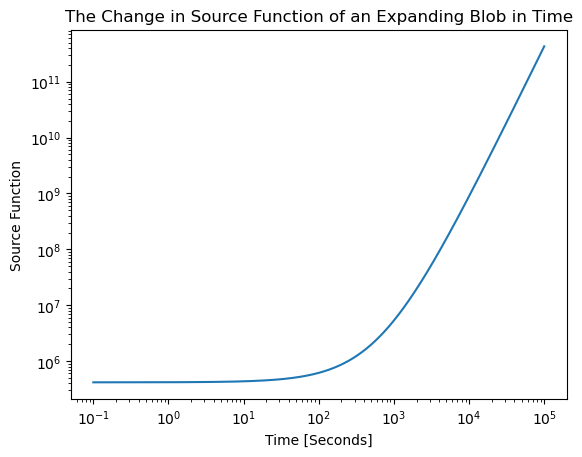

In [321]:
#Now we define a time interval.
#The system evolves very fast so time interval should be in miliseconds!
time_interval = np.logspace(-1, 5, 10000)

#Now we get our Graph of Intensity vs Time
plt.figure() #Creating the figure

#We plot the Time with Intensity (We convert it to mJy!)
#(1 Jy = 1e-23 erg/cm^2 => 1 mJy = 1e-26 erg/cm^2)
plt.plot(time_interval, (Specific_Intensity(time_interval)/1e-26)*(Radius(time_interval)**2/distance**2))

#We also add Labels and Title.
plt.title("The Change in Specific Intensity of an Expanding Blob in Time")
plt.xlabel("Time [Seconds]")
plt.ylabel("Flux [mJy]")
plt.xscale("log")
plt.yscale("log")

#We also check the Optical Depth change in time to check if it makes sense.
plt.figure() #Creating the figure
plt.plot(time_interval, 2*Radius(time_interval)*Absorption_Coefficient(time_interval))
plt.title("The Change in Optical Depth of an Expanding Blob in Time")
plt.xlabel("Time [Seconds]")
plt.ylabel("Optical Depth")
plt.xscale("log")
plt.yscale("log")

#We also check the Optical Depth change in time to check if it makes sense.
plt.figure() #Creating the figure
plt.plot(time_interval, Magnetic_Field(time_interval))
plt.title("The Change in Magnetic Field of an Expanding Blob in Time")
plt.xlabel("Time [Seconds]")
plt.ylabel("Magnetic Field Strength [Gauss]")
plt.xscale("log")
plt.yscale("log")

#We also check the Optical Depth change in time to check if it makes sense.
plt.figure() #Creating the figure
plt.plot(time_interval, (Source_Function(time_interval)/1e-26)*(Radius(time_interval)**2/distance**2))
plt.title("The Change in Source Function of an Expanding Blob in Time")
plt.xlabel("Time [Seconds]")
plt.ylabel("Source Function")
plt.xscale("log")
plt.yscale("log")

plt.show()